In [19]:
# IMPORTING LIBRARIES AND USABLE PACKAGES
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures #to convert the original features into their higher order terms 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [20]:
df = pd.read_csv('new_data.csv') # UPLOAD DATASET
df.head()

,Unnamed: 0,Depature Airport,Destination Airport,DEP Date,DEP Year,DEP Month,DEP Day,DEP weekday,DEP Time,ARR Date,ARR Year,ARR Month,ARR Day,ARR weekday,ARR Time,Fligh Duration Time,Delay
0,0,144,56,0,2015,10,27,1,92,0,2015,10,27,1,256,785.0,0.0
1,1,144,68,0,2015,10,27,1,118,0,2015,10,27,1,254,645.0,2.0
2,2,144,94,0,2015,10,27,1,129,0,2015,10,27,1,291,770.0,0.0
3,3,144,82,0,2015,10,27,1,150,1,2015,10,28,2,16,770.0,0.0
4,4,113,143,0,2015,10,27,1,171,0,2015,10,27,1,206,145.0,9.0


In [10]:
# REMOVING 1ST COLUMN
df.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [13]:
# PREDICTOR (X): Fligh Duration Time
# TARGET (y): Delay

X = np.nan_to_num(df['Fligh Duration Time']).reshape(-1,1) 
y = np.nan_to_num(df['Delay']).reshape(-1,1) 
y.shape == X.shape

True

In [14]:
# SPLITTING DATASET
# FOR USING MODEL WE SPLIT ONLY Fligh Duration Time and Delay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/8, random_state=123)

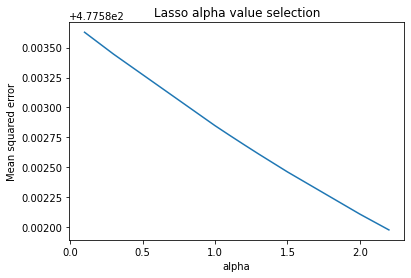

Best value of alpha: 2.2


In [21]:
# Using Lasso regularization
# Identifying best alpha
import matplotlib.pylab as plt
import numpy as np
from sklearn.metrics import mean_squared_error
%matplotlib inline

alphas = [2.2, 2, 1.5, 1.3, 1.2, 1.1, 1, 0.3, 0.1]
losses = []
for alpha in alphas:
    # Write (5 lines): create a Lasso regressor with the alpha value.
    # Fit it to the training set, then get the prediction of the validation set (x_val).
    # calculate the mean sqaured error loss, then append it to the losses array
    lasso = linear_model.Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    losses.append(mse)
plt.plot(alphas, losses)
plt.title("Lasso alpha value selection")
plt.xlabel("alpha")
plt.ylabel("Mean squared error")
plt.show()

best_alpha = alphas[np.argmin(losses)]
print("Best value of alpha:", best_alpha)

In [27]:
# Coefficient of Lasso
# Best alpha: 2.2
lasso = linear_model.Lasso(alpha=2.2,max_iter=100,tol=0.1)
lasso.fit(X_train,y_train)
print("Lasso Coefficient", lasso.coef_)

Lasso Coefficient [0.01530911]


In [33]:
# measuring
y_pred = lasso.predict(X_test)
print("MSE on testset:", mean_squared_error(y_test, y_pred))
print("RMSE on testset:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

MSE on testset: 475.2080869321574
RMSE on testset: 21.799268036614382
R2 Score: 0.006946877548726693
Mean Absolute Error: 10.401714573194239
